<b>Importing the required libraries</b>

In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

<b>Reading data and data analysis</b>

In [2]:
house_price = pd.read_csv("C:\\Users\\tkaly\\OneDrive\\Desktop\\Docs\\UpGrad\\Machine Learning-2\\Advanced Regression Assignment\\train.csv")

In [3]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_price.shape

(1460, 81)

In [5]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_price.describe([0.25,0.5,0.75,0.95,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<b>Checking null presence in data</b>

In [7]:
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending = False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
dtype: float64

<b>Dropping columns having more than 0.1% of null data</b>

In [8]:
df = round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/len(house_price.index),2).values> 0.1]
df

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [9]:
house_price = house_price.drop(df.index,axis=1)

In [10]:
house_price.shape

(1460, 75)

<b>Null ratio for remaining data</b>

In [11]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

<b>Converting in age where year is given from latest year</b>

In [12]:
house_price['YearBuilt_Old'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageYrBlt_Old'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Old'] = house_price.YrSold.max()-house_price.YrSold

In [13]:
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
194,1972,1972,1989.0,2008,38,38,21.0,2
1175,1992,2000,1992.0,2007,18,10,18.0,3
1142,2006,2007,2006.0,2007,4,3,4.0,3
1115,2007,2007,2007.0,2007,3,3,3.0,3
139,1997,1997,1997.0,2009,13,13,13.0,1
721,2004,2004,2004.0,2010,6,6,6.0,0
653,1906,1995,1906.0,2008,104,15,104.0,2
1029,1972,1972,1972.0,2006,38,38,38.0,4
306,1990,1991,1990.0,2007,20,19,20.0,3
1344,2006,2006,2006.0,2007,4,4,4.0,3


<b>Dropping years as it has been converted to age</b>

In [14]:
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

<b>Finding null values and replacing them with suitable values</b>

In [15]:
pd.options.display.max_rows = 100
house_price.isnull().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotArea              0
Street               0
LotShape             0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           8
MasVnrArea           8
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual            37
BsmtCond            37
BsmtExposure        38
BsmtFinType1        37
BsmtFinSF1           0
BsmtFinType2        38
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           1
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
BsmtFullBat

In [16]:
house_price.MasVnrType.fillna('None',inplace=True)
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(),inplace=True)
house_price.BsmtQual.fillna('TA',inplace=True)
house_price.BsmtCond.fillna('TA',inplace=True)
house_price.BsmtExposure.fillna('No',inplace=True)
house_price.BsmtFinType1.fillna('Unf',inplace=True)
house_price.BsmtFinType2.fillna('Unf',inplace=True)
house_price.GarageType.fillna('Attchd',inplace=True)
house_price.GarageYrBlt_Old.fillna(-1,inplace=True)
house_price.GarageFinish.fillna('Unf',inplace=True)
house_price.GarageQual.fillna('TA',inplace=True)
house_price.GarageCond.fillna('TA',inplace=True)

In [17]:
house_price.shape

(1460, 75)

In [18]:
house_price = house_price[house_price.Electrical.isnull() != True]

In [19]:
house_price.shape

(1459, 75)

In [20]:
pd.options.display.max_rows = 100
house_price.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath  

In [21]:
house_price.Street.value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [22]:
house_price.Utilities.value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

<b>Above results show that Street and Utilities column contains less variance. So droping the columns</b>

In [23]:
house_price = house_price.drop(['Street','Utilities'],axis='columns')

<b>ID is not required. So droping the column</b>

In [24]:
house_price = house_price.drop('Id',axis='columns')

In [25]:
house_price.dtypes

MSSubClass            int64
MSZoning             object
LotArea               int64
LotShape             object
LandContour          object
LotConfig            object
LandSlope            object
Neighborhood         object
Condition1           object
Condition2           object
BldgType             object
HouseStyle           object
OverallQual           int64
OverallCond           int64
RoofStyle            object
RoofMatl             object
Exterior1st          object
Exterior2nd          object
MasVnrType           object
MasVnrArea          float64
ExterQual            object
ExterCond            object
Foundation           object
BsmtQual             object
BsmtCond             object
BsmtExposure         object
BsmtFinType1         object
BsmtFinSF1            int64
BsmtFinType2         object
BsmtFinSF2            int64
BsmtUnfSF             int64
TotalBsmtSF           int64
Heating              object
HeatingQC            object
CentralAir           object
Electrical          

In [26]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,10517.363948,6.100069,5.575737,103.756328,443.943797,46.581220,567.366004,1057.891021,1162.906785,...,3.411926,15.071282,2.760795,43.518849,6.322824,180930.394791,38.755997,25.149417,29.709390,2.184373
std,42.310746,9984.666267,1.383171,1.113079,180.610600,456.106417,161.369977,441.992392,438.500975,386.572089,...,29.327247,55.775138,40.191018,496.291826,2.704331,79468.964025,30.199555,20.644343,25.120707,1.328542
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7549.000000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129950.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9477.000000,6.000000,5.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,26.000000,2.000000
75%,70.000000,11603.000000,7.000000,6.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


<b>Some graphs for EDA</b>

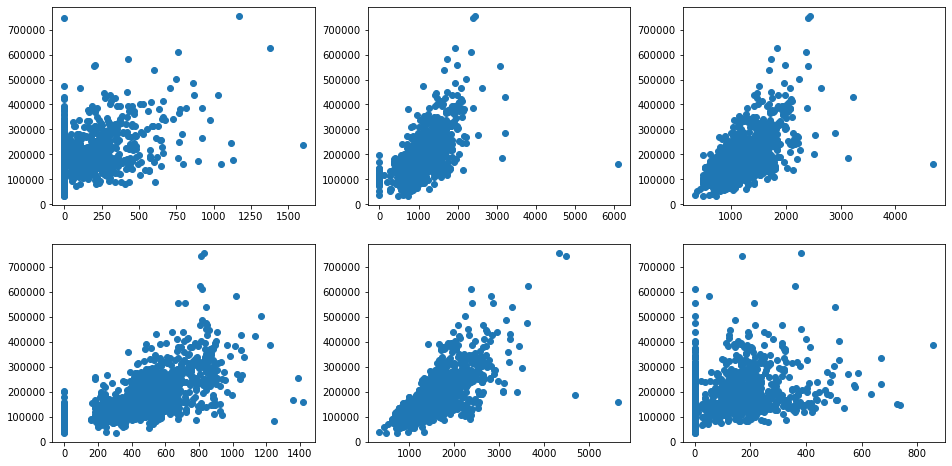

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)


<b>HeatMap for corelation between parameters</b>

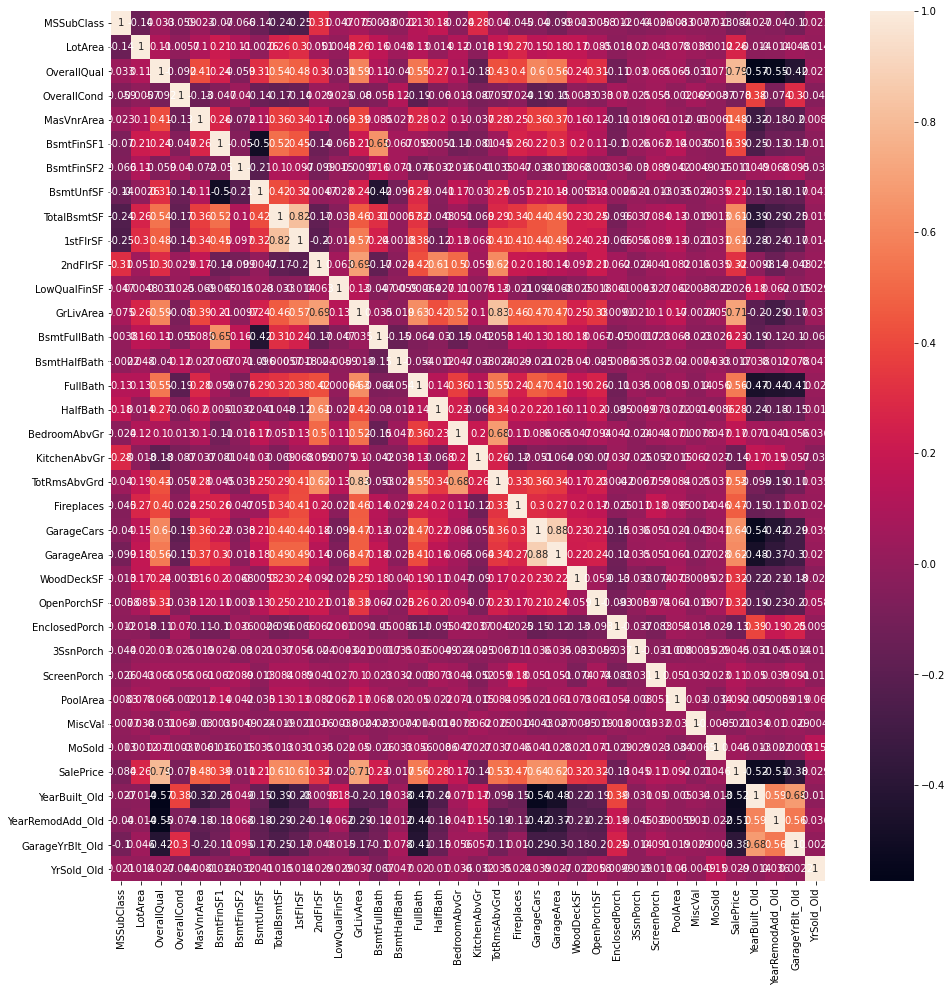

In [28]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [29]:
house_price.shape

(1459, 72)

<b>For accuracy purpose removing outliers
    Lower = 0.25 quantile
    Upper = 0.99 quantile
</b>

In [30]:
num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
          'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [31]:
house_price.shape

(1440, 72)

In [32]:
house_price[list(house_price.dtypes[house_price.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


<b>In below columns, some orders are found. So, let's map these</b>

In [33]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [34]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [35]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


<b>Creating dummies and dropping where necessary</b>

In [36]:
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price = pd.concat([house_price,dummy_col],axis='columns')

house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

<b>Distribution plot for target variable</b>

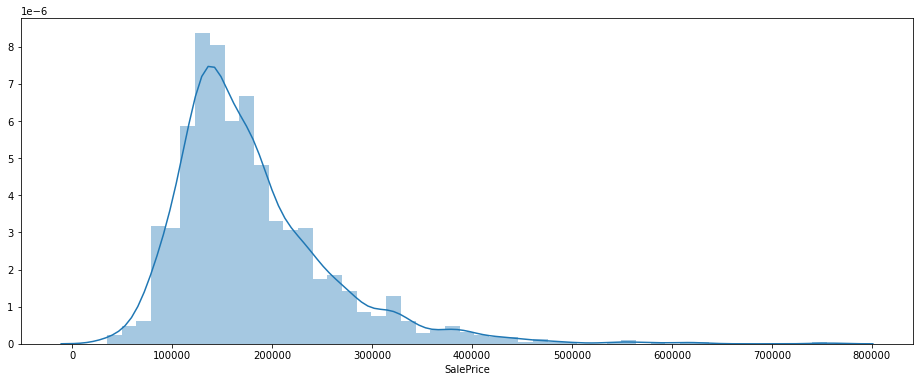

In [37]:
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

<b>Splitting train and test data</b>

In [38]:
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [39]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


<b>Standarding data</b>

In [40]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

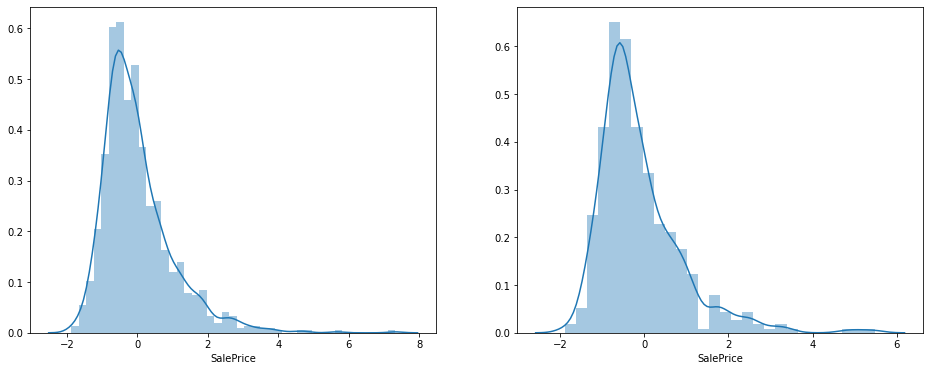

In [41]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [42]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [43]:
y_test = df_test.pop('SalePrice')
X_test = df_test

<b>To find optimal number of parameter, let's use RFE</b>

In [44]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [45]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [46]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [47]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

<b>Applying Lasso Regression Model</b>

In [48]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8989346010264372
0.8463221330919919


In [49]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.86),
 ('LotArea', 0.142),
 ('LotShape', 0.199),
 ('LandSlope', 0.161),
 ('OverallQual', 0.139),
 ('OverallCond', 0.157),
 ('MasVnrArea', 0.036),
 ('ExterQual', -0.0),
 ('ExterCond', 0.068),
 ('BsmtQual', 0.024),
 ('BsmtCond', 0.0),
 ('BsmtExposure', -0.037),
 ('BsmtFinType1', 0.366),
 ('BsmtFinSF1', 0.131),
 ('BsmtFinType2', 0.142),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.044),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', -0.079),
 ('CentralAir', 0.197),
 ('1stFlrSF', 0.128),
 ('2ndFlrSF', 0.267),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.367),
 ('BsmtFullBath', 0.432),
 ('BsmtHalfBath', 0.307),
 ('FullBath', 0.068),
 ('HalfBath', 0.094),
 ('BedroomAbvGr', 0.079),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.0),
 ('TotRmsAbvGrd', -1.991),
 ('Fireplaces', -0.174),
 ('GarageFinish', -0.179),
 ('GarageCars', -0.295),
 ('GarageArea', -0.232),
 ('GarageQual', -0.0),
 ('GarageCond', -0.06),
 ('WoodDeckSF', -0.009),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.063),
 ('3SsnPorch', -

<b>Let's improve model with different alpha value using GridSearch</b>

In [50]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

<b>Results for different alpha value</b>

In [51]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.032002,0.004539,0.002401,0.000490,0.001,{'alpha': 0.001},0.858092,0.372749,0.801404,0.913935,...,0.909665,0.896972,0.894835,0.902491,0.899183,0.897326,0.895765,0.898922,0.900816,0.005361
1,0.007001,0.000633,0.002200,0.000400,0.010,{'alpha': 0.01},0.858340,0.244456,0.842005,0.885884,...,0.842756,0.839228,0.841610,0.846715,0.839993,0.840171,0.837336,0.841152,0.844441,0.009184
2,0.004700,0.000458,0.002308,0.000454,0.100,{'alpha': 0.1},0.846677,0.409871,0.813124,0.847481,...,0.784723,0.786925,0.784652,0.797267,0.788227,0.786310,0.782089,0.787646,0.791228,0.011186
3,0.004101,0.000300,0.002499,0.000500,1.000,{'alpha': 1.0},-0.039641,-0.023740,-0.001909,-0.000329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004399,0.000492,0.002699,0.000458,5.000,{'alpha': 5.0},-0.039641,-0.023740,-0.001909,-0.000329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


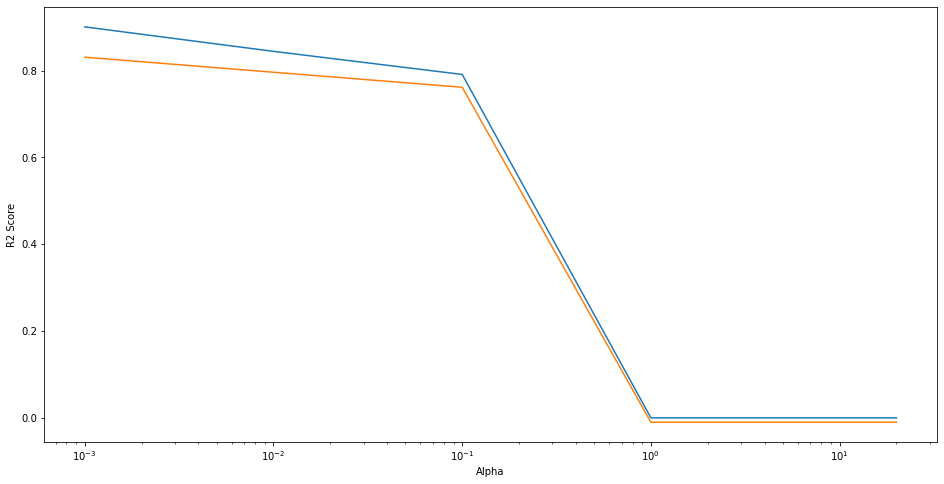

In [52]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

<b>Best alpha for Lasso</b>

In [53]:
model_cv.best_params_

{'alpha': 0.001}

In [54]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8989346010264372
0.8463221330919919


In [55]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [56]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
43,Exterior1st_BrkComm,1.577483
24,Neighborhood_StoneBr,0.432095
66,SaleType_Oth,0.379696
23,Neighborhood_NridgHt,0.366530
12,KitchenQual,0.365756


<br>If alpha value is doubled for Lasso regression</br>

In [57]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8916888077199777
0.8508299549977508


In [58]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [59]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
43,Exterior1st_BrkComm,1.254587
24,Neighborhood_StoneBr,0.372254
12,KitchenQual,0.361235
66,SaleType_Oth,0.352951
23,Neighborhood_NridgHt,0.338902


<b>Checking with Ridge Regression Model</b>

In [60]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9068418951428715
0.8210039448200147


<b>Results for different alpha value</b>

In [61]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005701,0.001953,0.002700,0.000782,0.001,{'alpha': 0.001},0.842254,0.429264,0.745635,0.919500,...,0.919001,0.904833,0.902850,0.910103,0.906481,0.905011,0.903727,0.907117,0.908716,0.005498
1,0.004601,0.000917,0.002700,0.000781,0.010,{'alpha': 0.01},0.842494,0.428867,0.748811,0.919474,...,0.918997,0.904832,0.902849,0.910102,0.906480,0.905010,0.903726,0.907116,0.908715,0.005498
2,0.004801,0.000401,0.002999,0.000447,0.100,{'alpha': 0.1},0.844555,0.425105,0.775892,0.919228,...,0.918683,0.904746,0.902761,0.910014,0.906394,0.904919,0.903625,0.907026,0.908606,0.005463
3,0.005201,0.000400,0.002700,0.000641,0.200,{'alpha': 0.2},0.846339,0.421313,0.798339,0.918977,...,0.917942,0.904529,0.902540,0.909795,0.906177,0.904692,0.903371,0.906798,0.908338,0.005389
4,0.005001,0.000633,0.002700,0.000458,0.500,{'alpha': 0.5},0.850098,0.411867,0.838399,0.918337,...,0.914813,0.903466,0.901474,0.908737,0.905131,0.903601,0.902148,0.905691,0.907090,0.005156


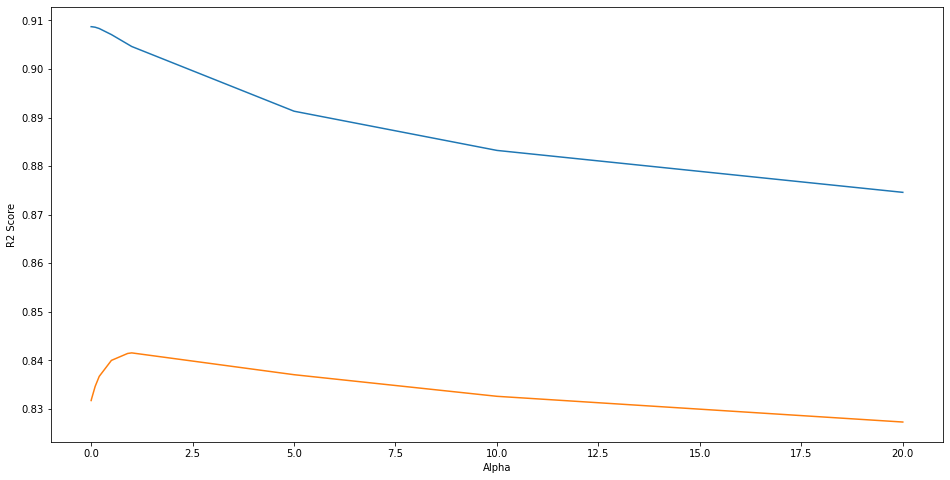

In [63]:

plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

<b>Best alpha for ridge</b>

In [64]:
model_cv.best_params_

{'alpha': 1.0}

In [65]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9035088063630226
0.8406125658726896


In [66]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [67]:
ridge_coef.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
43,Exterior1st_BrkComm,1.500835
24,Neighborhood_StoneBr,0.472051
23,Neighborhood_NridgHt,0.386557
25,Condition1_Feedr,0.384068
66,SaleType_Oth,0.380452


<br>If alpha value is doubled for Ridge regression</br>

In [68]:
ridge = Ridge(alpha = 2.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8995436773424049
0.8470036972644295


In [69]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [70]:
ridge_coef.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
43,Exterior1st_BrkComm,1.225736
24,Neighborhood_StoneBr,0.446637
23,Neighborhood_NridgHt,0.380133
66,SaleType_Oth,0.368091
25,Condition1_Feedr,0.348490


<br>As both lasso and ridge are giving alsmost same results.
<br>Few results can be observed.</br>
<br>1. As we can see from the data, most of the parameters affecting the result in low to medium range. So, Ridge will perform better</br>
<br>2. Lasso can also perform well as it penalizes the parameter heavily.</br>
<br>3. Elastic Net can also be used by mixing the parameter alpha between lasso and ridge.</br>
</br>

In [71]:
#Below are the parameters affecting most.
# 1. PoolArea
# 2. BsmtFullBath
# 3. BsmtHalfBath
# 4. GrLivArea
# 5. Neighborhood_Crawfor
# 6. BsmtFinType1

Best alpha value for Lasso : {'alpha': 0.001}

Best alpha value for Ridge : {'alpha': 1.0}

<br> After Removing five important predictor</br>
<br>For Lasso</br>

In [72]:
X_train_lasso = X_train.drop(['Exterior1st_BrkComm','Neighborhood_StoneBr','KitchenQual','SaleType_Oth','Neighborhood_NridgHt'],axis=1)
X_test_lasso = X_test.drop(['Exterior1st_BrkComm','Neighborhood_StoneBr','KitchenQual','SaleType_Oth','Neighborhood_NridgHt'],axis=1)

In [73]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_lasso,y_train)

y_train_pred = lasso.predict(X_train_lasso)
y_test_pred = lasso.predict(X_test_lasso)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.88614547224319
0.8261363400011135


In [74]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_lasso.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [75]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
40,Exterior1st_BrkFace,1.471939
62,SaleCondition_AdjLand,0.450180
12,MSZoning_FV,0.373858
3,BsmtQual,0.258615
22,Condition1_Feedr,0.246711
